# Pie charts vs Bar plots

In [13]:
import os
from dotenv import load_dotenv, find_dotenv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

load_dotenv(find_dotenv(usecwd=True));
data_folder=os.getenv('DATA_FOLDER')

# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

# Define colors
four_greys = [mpl.colormaps['tab20c_r'](i) for i in range(4)]

facecolor = four_greys[2]

edgecolor = 'black'

# Get the "PuBu" color map with 7 colors
seven_blues = plt.cm.PuBu(np.linspace(0, 1, 8))[1:] 
# Select the last 4 colors 
four_blues = plt.cm.PuBu(np.linspace(0, 1, 8))[-4:]

colors_okabeito = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

lw = 2

fs_xl = 36 # titles
fs_l = 24 # subtitles
fs_m = 16 # axs[0]s[0]es and tick labels
fs_s = 14 # small stuff

figsize_rect = (9, 5)
figsize_square = (8, 8)

def stamp(ax, color, alpha, label, clip_on=False, linewidth=5, fontsize=fs_m):
    ax.text(1.0, 1.0, label + "  ", color=color, alpha=alpha, fontsize=fontsize, weight='bold',
            va='top', ha='right', transform=ax.figure.transFigure, clip_on=clip_on)
    ax.add_patch(mpl.patches.ConnectionPatch(xyA=(1, 0), xyB=(1, 1), coordsA="figure fraction", 
                                         coordsB="figure fraction", axesA=ax, axesB=ax, 
                                         color=color, alpha=alpha, linewidth=linewidth,
                                         capstyle='butt', transform=ax.figure.transFigure))

def stamp_good(ax):
    stamp(ax, "olivedrab", 0.7, "good")

def stamp_phantom(ax):
    stamp(ax, "transparent", 0, "")

def stamp_bad(ax):
    stamp(ax, "#d02138", 1, "bad")

def stamp_wrong(ax):
    stamp(ax, "#8E202C", 1, "wrong")

def stamp_ugly(ax):
    stamp(ax, "#DC9515", 1, "ugly")

def plot_color_grid(colors):
    fig, ax = plt.subplots(1, 1, figsize=(len(colors), 1))

    for i, color in enumerate(colors):
        rect = mpl.patches.Rectangle((i, 0), 1, 1, facecolor=color)
        ax.add_patch(rect)

    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.axis('off')  # Hide axes
    plt.show()

## Attribution and License{.smaller}
The content of this presentation is based on chapter 10, Visualizing proportions in Wilke, Claus O. *Fundamentals in Data Vizualizations*;  O'Reilly Media Inc., 2019. 

The [author's manuscript](https://clauswilke.com/dataviz), [source code](https://github.com/clauswilke/dataviz) and [accompanying R-package](https://github.com/clauswilke/dviz.supp) are available online, licensed under the [Attribution-NonCommercial-NoDerivatives 4.0 International License](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode).

In [14]:
data_bundestag = {'party': ['CDU/CSU', 'SPD', 'FDP'], 'seats': [243, 214, 39],
                  'colors': ['#4E4E4E', '#B6494A', '#E7D739'],
                  'colors_original': ['#000000', '#E30113', '#FFED00']}

bundestag = pd.DataFrame(data_bundestag)

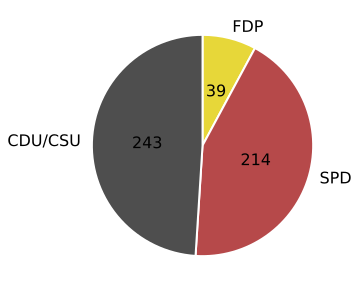

In [15]:
bundestag = bundestag.sort_values('seats')

# Calculate the total number of seats
seat_total = bundestag['seats'].sum()

# Calculate the angles for the pie slices
bundestag['angle'] = 2 * np.pi * bundestag['seats'] / seat_total

# Calculate the cumulative sum of the angles
bundestag['cumsum'] = np.cumsum(bundestag['angle'])

# Calculate the mid angle for the labels
bundestag['mid_angle'] = bundestag['cumsum'] - 0.5 * bundestag['angle']

# Create the pie chart
fig, ax = plt.subplots(figsize=figsize_rect)

# Draw the pie slices
ax.pie(bundestag['seats'], labels=bundestag['party'], colors=bundestag['colors'],
       startangle=90.0, counterclock=False, textprops={'fontsize': fs_m}, 
       wedgeprops=dict(edgecolor='white', linewidth=2))


# Draw the labels
for i, row in bundestag.iterrows():
    x = 0.5 * np.sin(row['mid_angle'])
    y = 0.5 * np.cos(row['mid_angle'])
    ax.text(x, y, row['seats'], ha='center', va='center', fontsize=fs_m)

# Set the aspect ratio of the plot to 1 to ensure the pie is drawn as a circle
ax.set_aspect('equal')

plt.show()

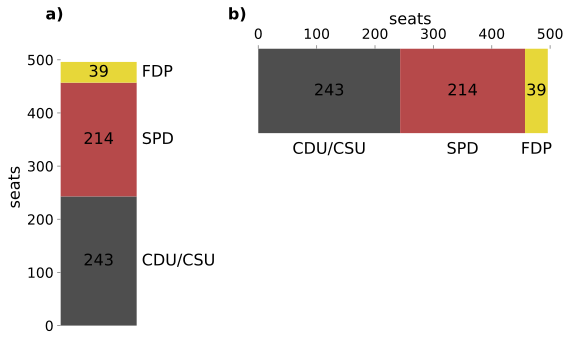

In [16]:
bundestag = bundestag.sort_values('seats', ascending=False)

# Calculate the cumulative sum of the seats
bundestag['cumsum'] = np.cumsum(bundestag['seats'])

# Calculate the y position for the labels
bundestag['label_y'] = bundestag['cumsum'] - 0.5 * bundestag['seats']

# Create the bar plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize_rect,
                        gridspec_kw={'width_ratios': [1, 2]})

bar_width = 0.5

bars = []
for i, row in bundestag.iterrows():
    bars.append(axs[0].bar(0, row['seats'], bottom=row['label_y'] - row['seats'] / 2,
           color=row['colors'], label=row['party'], width=bar_width,
           align='edge'))

# Draw the labels
for bar, label_y, seats, party in zip(bars, bundestag['label_y'], bundestag['seats'], bundestag['party']):
    axs[0].text(bar_width/2, label_y, seats, ha='center', va='center', fontsize=fs_m)

    axs[0].text(bar_width, label_y, ' ' + party, ha='left', va='center', fontsize=fs_m)

# Set the x limits to remove the space between the y-axis and the bars
axs[0].set_xlim(0, 1)

# Remove the x-axis
axs[0].xaxis.set_visible(False)

# Remove the y-axis
# ax.yaxis.set_visible(False)
axs[0].set_ylabel('seats', fontsize=fs_m)

# Set the y-ticks color to grey
axs[0].tick_params(axis='y', colors='grey', labelsize=fs_s)

# Set the y-tick labels color to black
for label in axs[0].get_yticklabels():
    label.set_color('black')

# Set the y-ticks color to grey
for line in axs[0].yaxis.get_ticklines():
    line.set_color('grey')

# Remove the plot frame
axs[0].set_frame_on(False)


# Get the position of axs[0] and axs[1]
pos_axs0 = axs[0].get_position()
pos_axs1 = axs[1].get_position()

# Calculate the width of axs[0] and the height of axs[1]
width_axs0 = pos_axs0.x1 - pos_axs0.x0
height_axs1 = pos_axs1.y1 - pos_axs1.y0

# Calculate the ratio
ratio = width_axs0 / height_axs1

h_bar_height = bar_width * ratio *2

bars = []
for i, row in bundestag.iterrows():
    bars.append(axs[1].barh(1-h_bar_height, row['seats'], left=row['label_y'] - row['seats'] / 2,
           color=row['colors'], label=row['party'], height=h_bar_height, align='edge'))

# Draw the labels
for bar, label_y, seats, party in zip(bars, bundestag['label_y'], bundestag['seats'], bundestag['party']):
    axs[1].text(label_y, 1-h_bar_height/2, seats, ha='center', va='center', fontsize=fs_m)
    axs[1].text(label_y, 1-h_bar_height*1.1, party, ha='center', va='top', fontsize=fs_m)

# Set the y limits to remove the space between the x-axis and the bars
axs[1].set_ylim(0, 1)

# Remove the y-axis
axs[1].yaxis.set_visible(False)

# Set the x-axis label
axs[1].set_xlabel('seats', fontsize=fs_m)
axs[1].xaxis.set_label_position('top')

# Set the x-ticks color to grey
axs[1].tick_params(axis='x', colors='grey', labelsize=fs_s)
# Move the x-ticks to the top
axs[1].xaxis.tick_top()

# Set the x-tick labels color to black
for label in axs[1].get_xticklabels():
    label.set_color('black')

# Set the x-ticks color to grey
for line in axs[1].xaxis.get_ticklines():
    line.set_color('grey')

# Remove the plot frame
axs[1].set_frame_on(False)

# Add label 'a)' to axs[0]
axs[0].text(-0.1, 1.15, 'a)', transform=axs[0].transAxes, fontsize=16, fontweight='bold', va='top')

# Add label 'b)' to axs[1]
axs[1].text(-0.1, 1.15, 'b)', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='top')
plt.show()

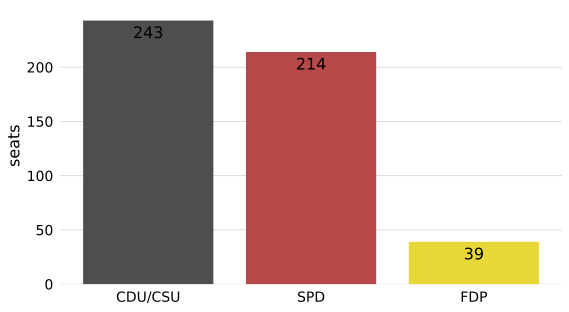

In [17]:
bundestag = bundestag.sort_values('seats', ascending=False)

# Calculate the cumulative sum of the seats
bundestag['cumsum'] = np.cumsum(bundestag['seats'])

# Calculate the y position for the labels
bundestag['label_y'] = bundestag['cumsum'] - 0.5 * bundestag['seats']

# Create the bar plot
fig, ax = plt.subplots(figsize=figsize_rect)

ax.bar(bundestag['party'], bundestag['seats'], color=bundestag['colors'])

# Draw the labels
for bar, label_y, seats, party in zip(bars, bundestag['label_y'], bundestag['seats'], bundestag['party']):
    ax.text(party, seats-5, str(seats), ha='center', va='top', fontsize=fs_m)

# Set y-axis labels
plt.yticks([0, 50, 100, 150, 200], ['0', '50', '100', '150', '200'])

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

ax.set_ylabel('seats', fontsize=fs_m)

# Set the same line properties on the y-ticks
for tick in ax.yaxis.get_major_ticks():
    tick.gridline.set_color('lightgrey')

# Remove the x-ticks but keep the labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
               labelsize=fs_s)

# Set the y-tick labels color to black
for label in ax.get_yticklabels():
    label.set_color('black')

# Set the y-ticks color to grey
for line in ax.yaxis.get_ticklines():
    line.set_color('grey')

# Move gridlines to the background
ax.set_axisbelow(True)

# Remove the plot frame
ax.set_frame_on(False)

# Remove the spines
ax.spines[:].set_visible(False)
plt.show()

In [18]:
percent = [17, 18, 20, 22, 23, 20, 20, 19, 21, 20, 23, 22, 20, 18, 17]
company = ['A', 'B', 'C', 'D', 'E'] * 3
year = ['2015'] * 5 + ['2016'] * 5 + ['2017'] * 5

marketshare = pd.DataFrame({'percent': percent, 'company': company, 'year': year})
marketshare

,percent,company,year
0,17,A,2015
1,18,B,2015
2,20,C,2015
3,22,D,2015
4,23,E,2015
5,20,A,2016
6,20,B,2016
7,19,C,2016
8,21,D,2016
9,20,E,2016


In [19]:
marketshare.style.hide()

percent,company,year
17,A,2015
18,B,2015
20,C,2015
22,D,2015
23,E,2015
20,A,2016
20,B,2016
19,C,2016
21,D,2016
20,E,2016


In [20]:
np.sort(marketshare['year'].unique())

array(['2015', '2016', '2017'], dtype=object)

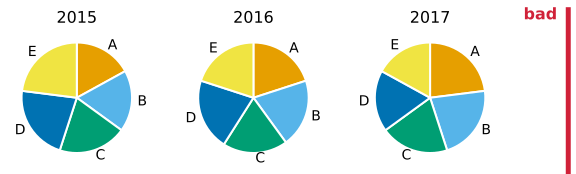

In [21]:
# Group by year and calculate cumulative sum of percent
marketshare['total'] = marketshare.groupby('year')['percent'].transform('sum')
marketshare['cumsum'] = marketshare.groupby('year')['percent'].cumsum()

# Calculate angles for pie chart
marketshare['start_angle'] = 2 * np.pi * (marketshare['cumsum'] - marketshare['percent']) / marketshare['total']
marketshare['end_angle'] = 2 * np.pi * marketshare['cumsum'] / marketshare['total']

years = np.sort(marketshare['year'].unique())

fig, axs = plt.subplots(nrows=1, ncols=len(years), figsize=(9,2.5))

# Plot pie chart for each year
for i, yr in enumerate(years):
    df = marketshare[marketshare['year'] == yr]
    
    axs[i].pie(df['percent'], labels=df['company'], startangle=90, counterclock=False,
               colors=[colors_okabeito[i] for i in [1, 2, 3, 5, 4]],
               textprops={'fontsize': fs_s}, wedgeprops=dict(edgecolor='white', linewidth=2))
    axs[i].set_aspect('equal')
    axs[i].set_title(yr, fontsize=fs_m)

stamp_bad(axs[-1])
plt.show()


Source: Wikipedia, User:Schutz. 2007. “File:Piecharts.svg.” https://en.wikipedia.org/wiki/File:Piecharts.svg.

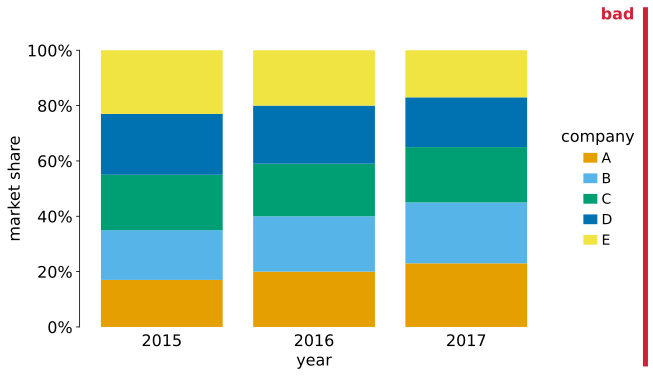

In [22]:
fig, ax = plt.subplots(figsize=figsize_rect)

bottom = np.zeros(len(marketshare['year'].unique()))
for company, color in zip(['A', 'B', 'C', 'D', 'E'], [colors_okabeito[i] for i in [1, 2, 3, 5, 4]]):
    data = marketshare[marketshare['company'] == company]
    ax.bar(data['year'], data['percent'], bottom=bottom, color=color, label=company)
    bottom += data['percent'].to_numpy()

# Remove x-axis and y-axis labels
ax.set_xlabel('year', fontsize=fs_m)
ax.set_ylabel('market share', fontsize=fs_m)

# Remove x-axis ticks
ax.xaxis.set_ticks_position('none')

ax.set_ylim([0,100])

# Format y-axis tick labels with percentage sign
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mpl.ticker.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

ax.tick_params(axis='both', bottom=False, left=True, labelsize=fs_m)

# Remove grid lines
ax.grid(False)

# Move the legend to the bottom
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,
          frameon=False, title='company', title_fontsize=fs_m,
          handlelength=1, handletextpad=0.3, fontsize=fs_s)

# Remove axis line
for loc in ['right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

plt.subplots_adjust(right=0.85)

stamp_bad(ax)
plt.show()

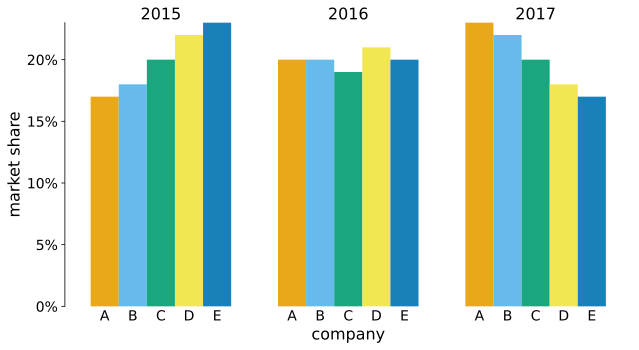

In [23]:
years = marketshare['year'].unique()

companies = ['A', 'B', 'C', 'D', 'E']

# Positions
x = np.arange(len(years))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=figsize_rect)

# Create bar plot
multiplier = 0
max_height = 0
all_rects = []
company_labels = []

for i, company in enumerate(companies):
    data = marketshare[marketshare['company'] == company]
    
    offset = width * multiplier
    rects = ax.bar(x + offset, data['percent'], width, color=colors_okabeito[1:][i],
                   alpha=0.9, label=company)
    all_rects.extend(rects)
    company_labels.extend([company] * len(data))
    max_height = max(max_height, max(data['percent']))

    multiplier += 1


# Set y-axis labels and limits
ax.set_ylim([0,23])

ax.set_yticks([0, 5, 10, 15, 20])
# Format y-axis tick labels with percentage sign
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mpl.ticker.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s)

# Set x-axis label
ax.set_xlabel('company', fontsize=fs_m)

# Set y-axis label
ax.set_ylabel('market share', fontsize=fs_m)

# Add group labels above the bars
for i, year in enumerate(years):
    ax.text(i + width * (len(companies) - 1) / 2, ax.get_ylim()[1], year,
            ha='center', va='bottom', fontsize=fs_m)

# Set x-ticks to be the locations of the bars
ax.set_xticks([r.get_x() + r.get_width() / 2 for r in all_rects])

# Set x-tick labels to be the companies
ax.set_xticklabels(company_labels)

# Hide x-ticks
ax.tick_params(axis='x', length=0)

for loc in ['right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.tight_layout()

plt.show()

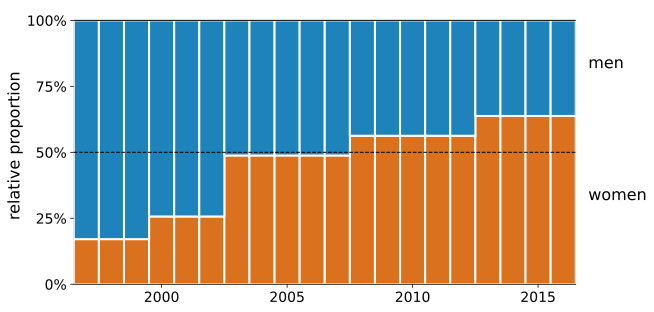

In [24]:
# Read the CSV file
women_parliaments = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'women_parliaments', "women_tidy.csv"))

ccode = "RWA" # Rwanda

# Filter the data
women_rwanda = women_parliaments[(women_parliaments['country_code'] == ccode) & (women_parliaments['year'] > 1990)].copy()

# Create new columns
women_rwanda['women'] = women_rwanda['perc_women']
women_rwanda['men'] = 100 - women_rwanda['perc_women']

# Melt the dataframe to long format
women_rwanda = pd.melt(women_rwanda, id_vars=['country', 'country_code', 'year'], value_vars=['women', 'men'], var_name='gender', value_name='percent')

# Sort the dataframe by gender
women_rwanda['gender'] = pd.Categorical(women_rwanda['gender'], categories=['women', 'men'], ordered=True)
women_rwanda.sort_values('year', inplace=True)

bar_width=1.0

# Plot
fig, ax = plt.subplots(figsize=figsize_rect)

years = np.sort(women_rwanda['year'].unique())

bottom = np.zeros(len(years))
for gender, color in zip(['women', 'men'], ['#D55E00E0', '#0072B2E0']):
    data = women_rwanda[women_rwanda['gender'] == gender]
    ax.bar(data['year'], data['percent'], bottom=bottom, color=color, edgecolor='#FFFFFF',
           linewidth=2.0, label=gender, width=bar_width)
    bottom += data['percent'].to_numpy()

# Add horizontal lines
ax.axhline(y=50, color='#000000FF', linewidth=1.0, linestyle='--')
ax.axhline(y=100, color='black', linewidth=1.0, linestyle='-')

# Set the y-axis label
ax.set_ylabel('relative proportion', fontsize=fs_m)

ax.set_yticks([0, 25, 50, 75, 100])

# Format the y-axis labels as percentages
ax.yaxis.set_major_formatter(lambda x, _: '{:.0%}'.format(x/100))

ax.set_xlim([years[0]-bar_width/2, years[-1]+bar_width/2])
ax.set_xticks([2000, 2005, 2010, 2015])

# Remove the y-axis line
for loc in ['left', 'right', 'top']:
    ax.spines[loc].set_visible(False)

# Set the fontsize for the x-axis and y-axis tick labels
ax.tick_params(axis='both', which='major', labelsize=fs_s)

# Add labels
bottom = 0.0
for gender in ['women', 'men']:
    data = women_rwanda[(women_rwanda['gender'] == gender) & (women_rwanda['year'] == years[-1])]
    
    ax.text(years[-1] + bar_width, bottom + data['percent'].to_numpy()[0]/2, gender,
            fontsize=fs_m)

    bottom += data['percent'].to_numpy()[0]

plt.show()